In [111]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

#from pandas import read_html

import pandas as pd

In [112]:
data = pd.read_csv("US_population.csv",index_col ='year')
pop = data.population /1e6;

Saving figure to file proj01-fig01.png


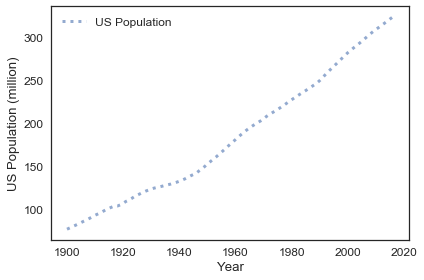

In [113]:
plot (pop,':', label ='US Population')
decorate(xlabel='Year',
        ylabel='US Population (million)')
savefig('proj01-fig01.png')

In [114]:
t_0 = get_first_label(pop)
t_gd_start = 1928
t_gd_end = 1941
t_agd_start = t_gd_end + 1
t_end = get_last_label(pop)

2016

In [115]:
elapsed_time_bgd = t_gd_start - t_0
p_0 =  pop[t_0]
p_gd_start = pop[t_gd_start]
deltap_bgd = p_gd_start - p_0
growth_rate_bgd = deltap_bgd/elapsed_time_bgd

1.5862500000000002

In [116]:
elapsed_time_agd = t_end - t_agd_start
p_agd_start = pop[t_agd_start]
p_end = pop[t_end]
deltap_agd = p_end - p_agd_start
growth_rate_agd = deltap_agd/elapsed_time_agd

2.554463527027027

In [117]:
system = System(t_0 = t_0,
                t_gd_start = t_gd_start,
                t_gd_end = t_gd_end,
                t_agd_start = t_agd_start,
                t_end = t_end,
                p_gd_start = p_gd_start,
                p_agd_start = p_agd_start,
                growth_rate_bgd = growth_rate_bgd,
                growth_rate_agd = growth_rate_agd);

In [118]:
pop_agd = pop [(pop.index >= t_agd_start) & (pop.index <= t_end)];

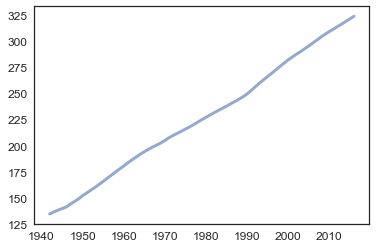

In [119]:
plot (pop_agd, '-', label = "Original agd")

In [120]:
pop_pre_gd = pop [(pop.index >= t_0) & (pop.index <= t_gd_start -1)];

In [121]:
def run_simulation (system, update_func):
    results = TimeSeries()
    results[system.t_gd_start] = system.p_gd_start
    
    for t in linrange(system.t_gd_start, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

In [122]:
def update_func_gd (pop,t,system):
    if t <= t_gd_end:
        return pop + system.growth_rate_bgd
    else:
        return pop + system.growth_rate_agd

gd_results = run_simulation (system, update_func_gd);

In [123]:
results_thru_gd = pop_pre_gd.append(gd_results);

Saving figure to file proj01-fig02.png


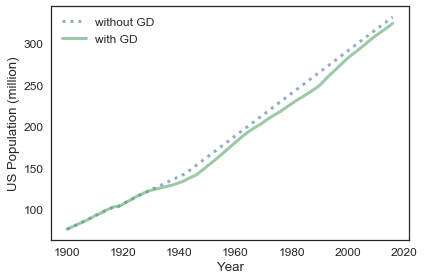

In [124]:
plot (results_thru_gd, ':',label = "without GD")
plot(pop, '-', label = "with GD")
decorate(xlabel='Year',
        ylabel='US Population (million)')
savefig('proj01-fig02.png')